### Popular Dimentionality Reduction Techniques
* PCA
* Kernel PCA
* LLE

**Manifold Hypothesis**
* The manifold hypothesis is a fundamental concept in machine learning and data analysis that states that many high-dimensional data sets can be represented as a lower-dimensional manifold. 

### PCA

* It identifies the hyperplane that lies closest to the data, and then it projects the data onto it.
* Step 1: Do centering of data: If centering not done than eigen values will not represent variance in data whereas it will be reprentative of mean.
* Step 2: Find covariance matrix: Covariance is a measure of how two variables vary together.
* Find Eigen vectors :Represents the direction of PCs
* Find Eigen values: Signify the amount of variation/variance along axes/PCs.

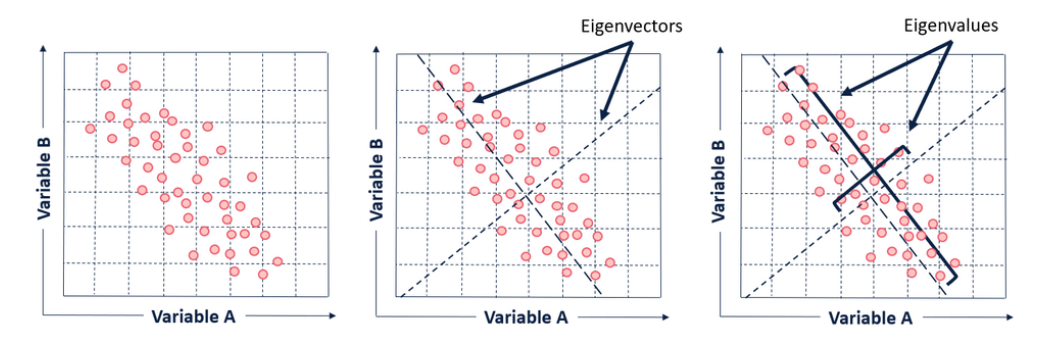

**Diferrence Covariance and Corelation**

* Covariance
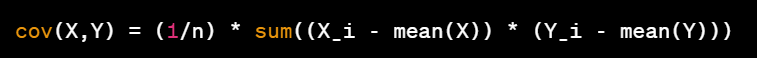
* Corelation
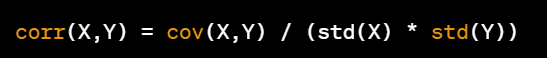

* Corelation is the standardised version of covariance because covariance can be high even if two variables are weakly related to each other just because their magnitudes are high.

### SVD
* SVD is a matrix factorization technique that decomposes a matrix(**A**) into three constituent parts, namely:
    * A left singular matrix(**U/ATA**)
    * A diagonal matrix of singular values(**∑**)
    * A right singular matrix(**V/AAT**)
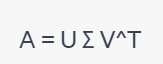

* Working Example of SVD.
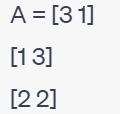
     * 1.To compute SVD we need to compute ATA and ATA.
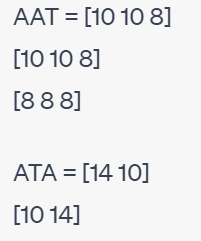
     * 2.Next we find the eigen values and eigen vectors of ATA and ATA.
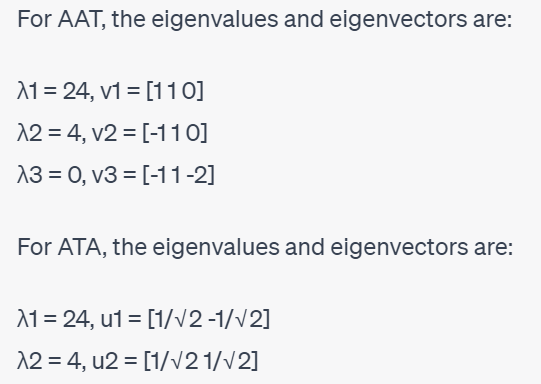
     * 3.Using these eigenvectors, we can construct the left singular matrix U, the diagonal matrix Σ, and the right singular matrix V:
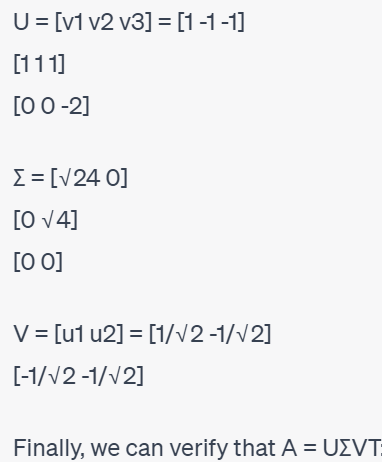

**Principal components matrix**
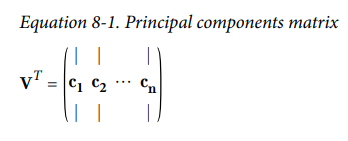

In [4]:
import numpy as np
import pandas as pd

In [9]:
# Load MNIST dataset
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame= False)
X,y=mnist['data'],mnist['target']
print(X.shape,y.shape)
X=X[:700,:]
y=y[:700]
print(X.shape)
print(y.shape)

(70000, 784) (70000,)
(700, 784)
(700,)


In [16]:
X_centered = X - X.mean(axis=0)
print(X_centered.shape)
U, s, V = np.linalg.svd(X_centered)
print('U shape: {},s shape: {},V shape: {}'.format(U.shape,s.shape,V.shape))
# principal components
c1 = V.T[:, 0]
c2 = V.T[:, 1]
print(c1.shape,c2.shape)

(700, 784)
U shape: (700, 700),s shape: (700,),V shape: (784, 784)
(784,) (784,)


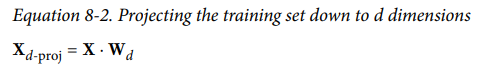

In [18]:
W2 = V.T[:, :2]      # principal components
print(W2.shape)
X2D = X_centered.dot(W2)
print(X2D.shape)


(784, 2)
(700, 2)


### Sklearn implementation of PCA
* Sklearn also internally uses SVD

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
print(X2D.shape)

(700, 2)


**Explained Varaince Ratio**
* It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.
* For example, let’s look at the explained variance ratios of the first two compo‐nents of the 3D dataset.
* This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6% lies along the second axis. This leaves less than 1.2% for the third axis, so it is reason‐able to assume that it probably carries little information.

In [22]:
 print(pca.explained_variance_ratio_)

[0.10348909 0.07388285]


**Choosing the right number of dimensions**

* 1.Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).
* 2.Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum; see Figure 8-8).


In [24]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

### Or

In [23]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

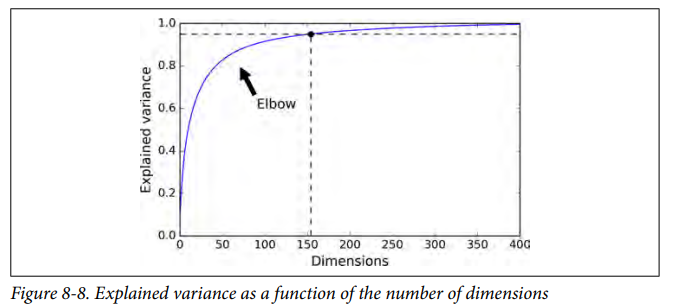

**PCA for Compression**
* Lets say MNIST dataset has 784 dimensions and if we do dimensionality reduction by preserving 95% of variance then dimensions=150.

* It is possible to decompress the reduced daataset back to 784 dimensions by applying the inverse transformation of the PCA projection.(This won't give the original dataset as in projections information is lost).

In [27]:
pca = PCA(n_components = 154)
print('X_mnist shape',X.shape)
X_mnist_reduced = pca.fit_transform(X)
print('X_mnist_reduced shape',X_mnist_reduced.shape)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)
print('X_mnist_recovered shape',X_mnist_recovered.shape)


X_mnist shape (700, 784)
X_mnist_reduced shape (700, 154)
X_mnist_recovered shape (700, 784)


**Incremental PCA**

* One problem with the preceding implementation of PCA is that it requires the whole training set to fit in memory in order for the SVD algorithm to run.
* By using IPCA algorithm you can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

In [33]:
from sklearn.decomposition import IncrementalPCA
n_batches = 10
inc_pca = IncrementalPCA(n_components=50)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X)
print(X_mnist_reduced.shape)

(700, 50)


In [35]:
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=50, batch_size=batch_size)
# inc_pca.fit(X_mm)

**Randomized PCA**
* The advantage of using randomized PCA over traditional PCA is that it can be much faster for large datasets with a high number of dimensions. The advantage of using randomized PCA over traditional PCA is that it can be much faster for large datasets with a high number of dimensions. 

* Randomized PCA works by first creating a smaller matrix from the original dataset by selecting a subset of the columns randomly. 

* This smaller matrix is then used to compute the principal components, which capture the most important patterns in the data.

* The principal components can then be used to reduce the dimensionality of the original dataset.

In [37]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)
print(X_reduced.shape)

(700, 154)


**Kernel PCA**

In [38]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


**Selecting a Kernel and Tuning Hyperparameters**


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])

param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]


grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [41]:
grid_search.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}

### LLE(Locally Linear Embedding)

* The LLE algorithm is used to transform high-dimensional data into a lower-dimensional space while preserving the local structure of the data. 
* The LLE algorithm is particularly useful when dealing with non-linear data that cannot be easily represented in a lower-dimensional space using traditional methods like PCA.

### Other Dimensionality Reduction Techniques